## **STEP 1: Data collection**

In [5]:
from dotenv import load_dotenv
load_dotenv()

True

In [6]:
!kaggle datasets download -d neurocipher/heartdisease -p ../data/raw --unzip

Dataset URL: https://www.kaggle.com/datasets/neurocipher/heartdisease
License(s): apache-2.0
  0%|                                               | 0.00/3.41k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 3.41k/3.41k [00:00<00:00, 2.55MB/s]


## **STEP 2: Exploratory Data Analysis**

In [8]:
import pandas as pd
raw_data = pd.read_csv("../data/raw/Heart_Disease_Prediction.csv")
print("[INFO] data loaded successfully")

[INFO] data loaded successfully


In [9]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

#### INITIAL OBSERVATIONS

- There are 14 columns
- 13 numerical columns and 1 categorical column
- no NaN values

In [11]:
raw_data.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [12]:
raw_data.columns = ["age", "sex", "chest_pain_type",
                    "bp", "cholesterol", "fbs_over_120",
                    "ekg_results", "max_hr", "exercise_angina",
                    "st_depression", "slope_of_st", 
                    "number_of_vessels_fluor", "thallium",
                    "target"]

In [14]:
numerical_columns = raw_data.select_dtypes(include=["int64", "float64"]).columns.to_list()
categorical_columns = raw_data.select_dtypes(include=["object"]).columns.to_list()

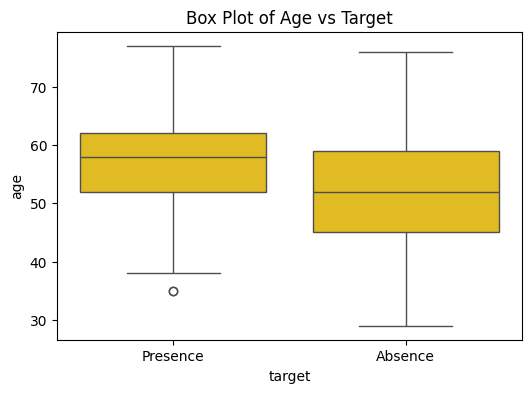

In [27]:
# box plot of numerical columns
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))

sns.boxplot(
    data=raw_data,
    x="target",
    y="age",
    color="#ffce05"
)

plt.title("Box Plot of Age vs Target")
plt.show()

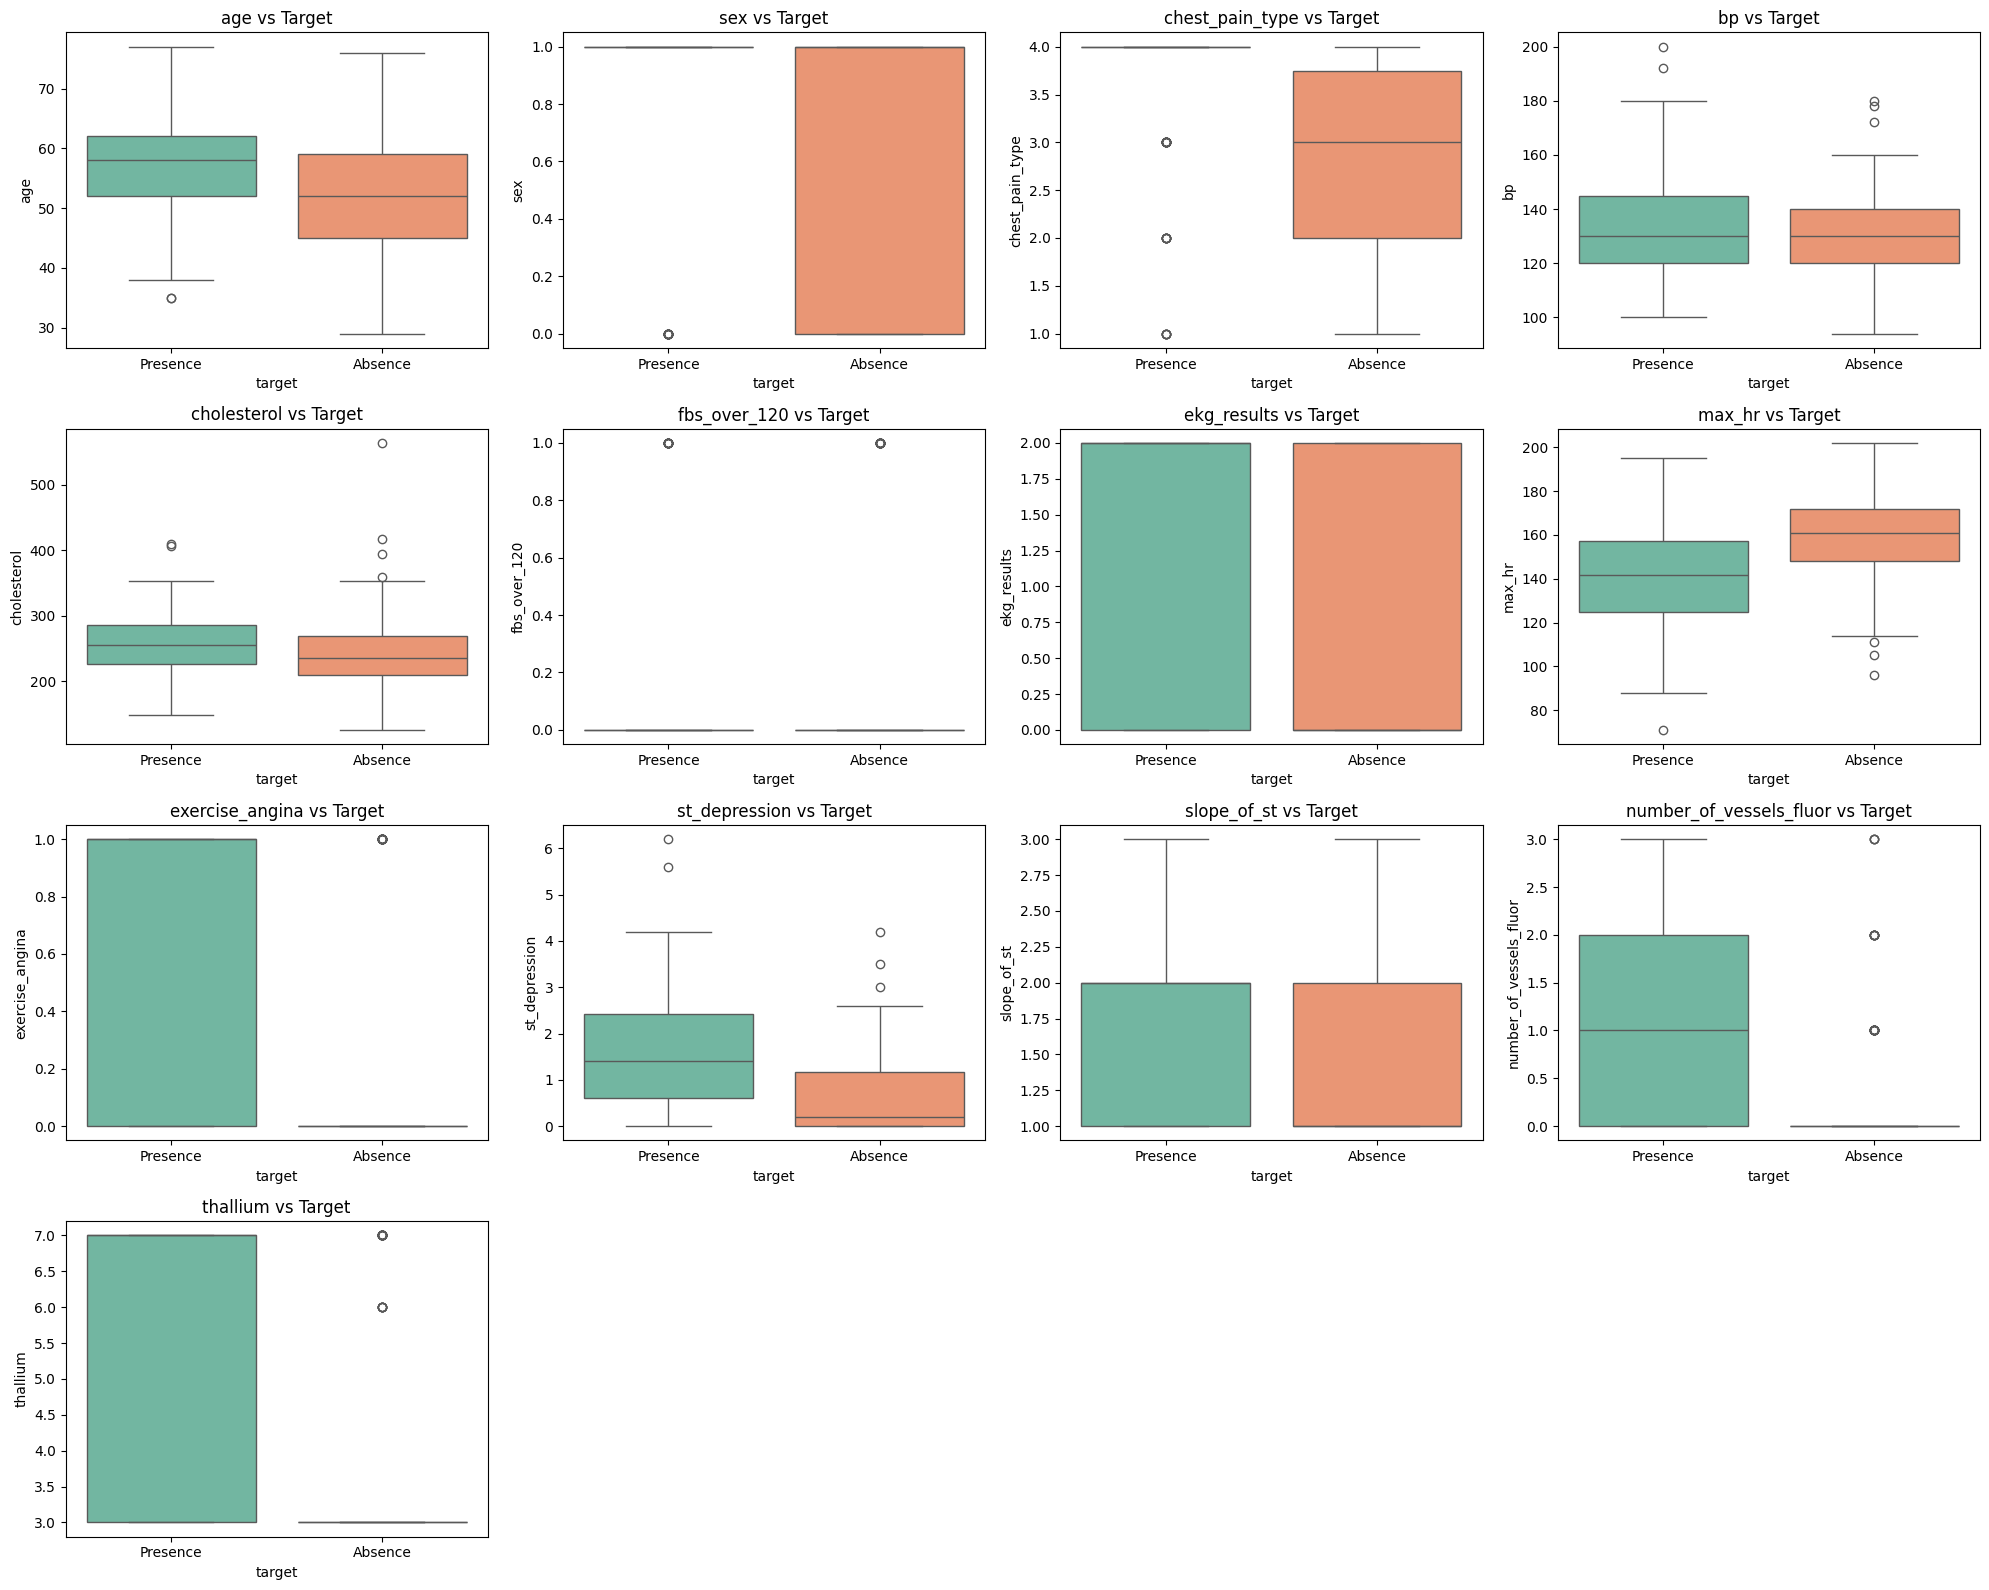

In [31]:
import numpy as np
colors = sns.color_palette("tab20", len(numerical_columns))

# Grid size
n_cols = 4
n_rows = int(np.ceil(len(numerical_columns) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
axes = axes.flatten()  # flatten for easy iteration

for i, col in enumerate(numerical_columns):
    sns.boxplot(
        data=raw_data,
        x="target",
        y=col,
        ax=axes[i],
        palette="Set2",
        hue="target"
    )
    axes[i].set_title(f"{col} vs Target")

# Remove empty subplots if any
for j in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


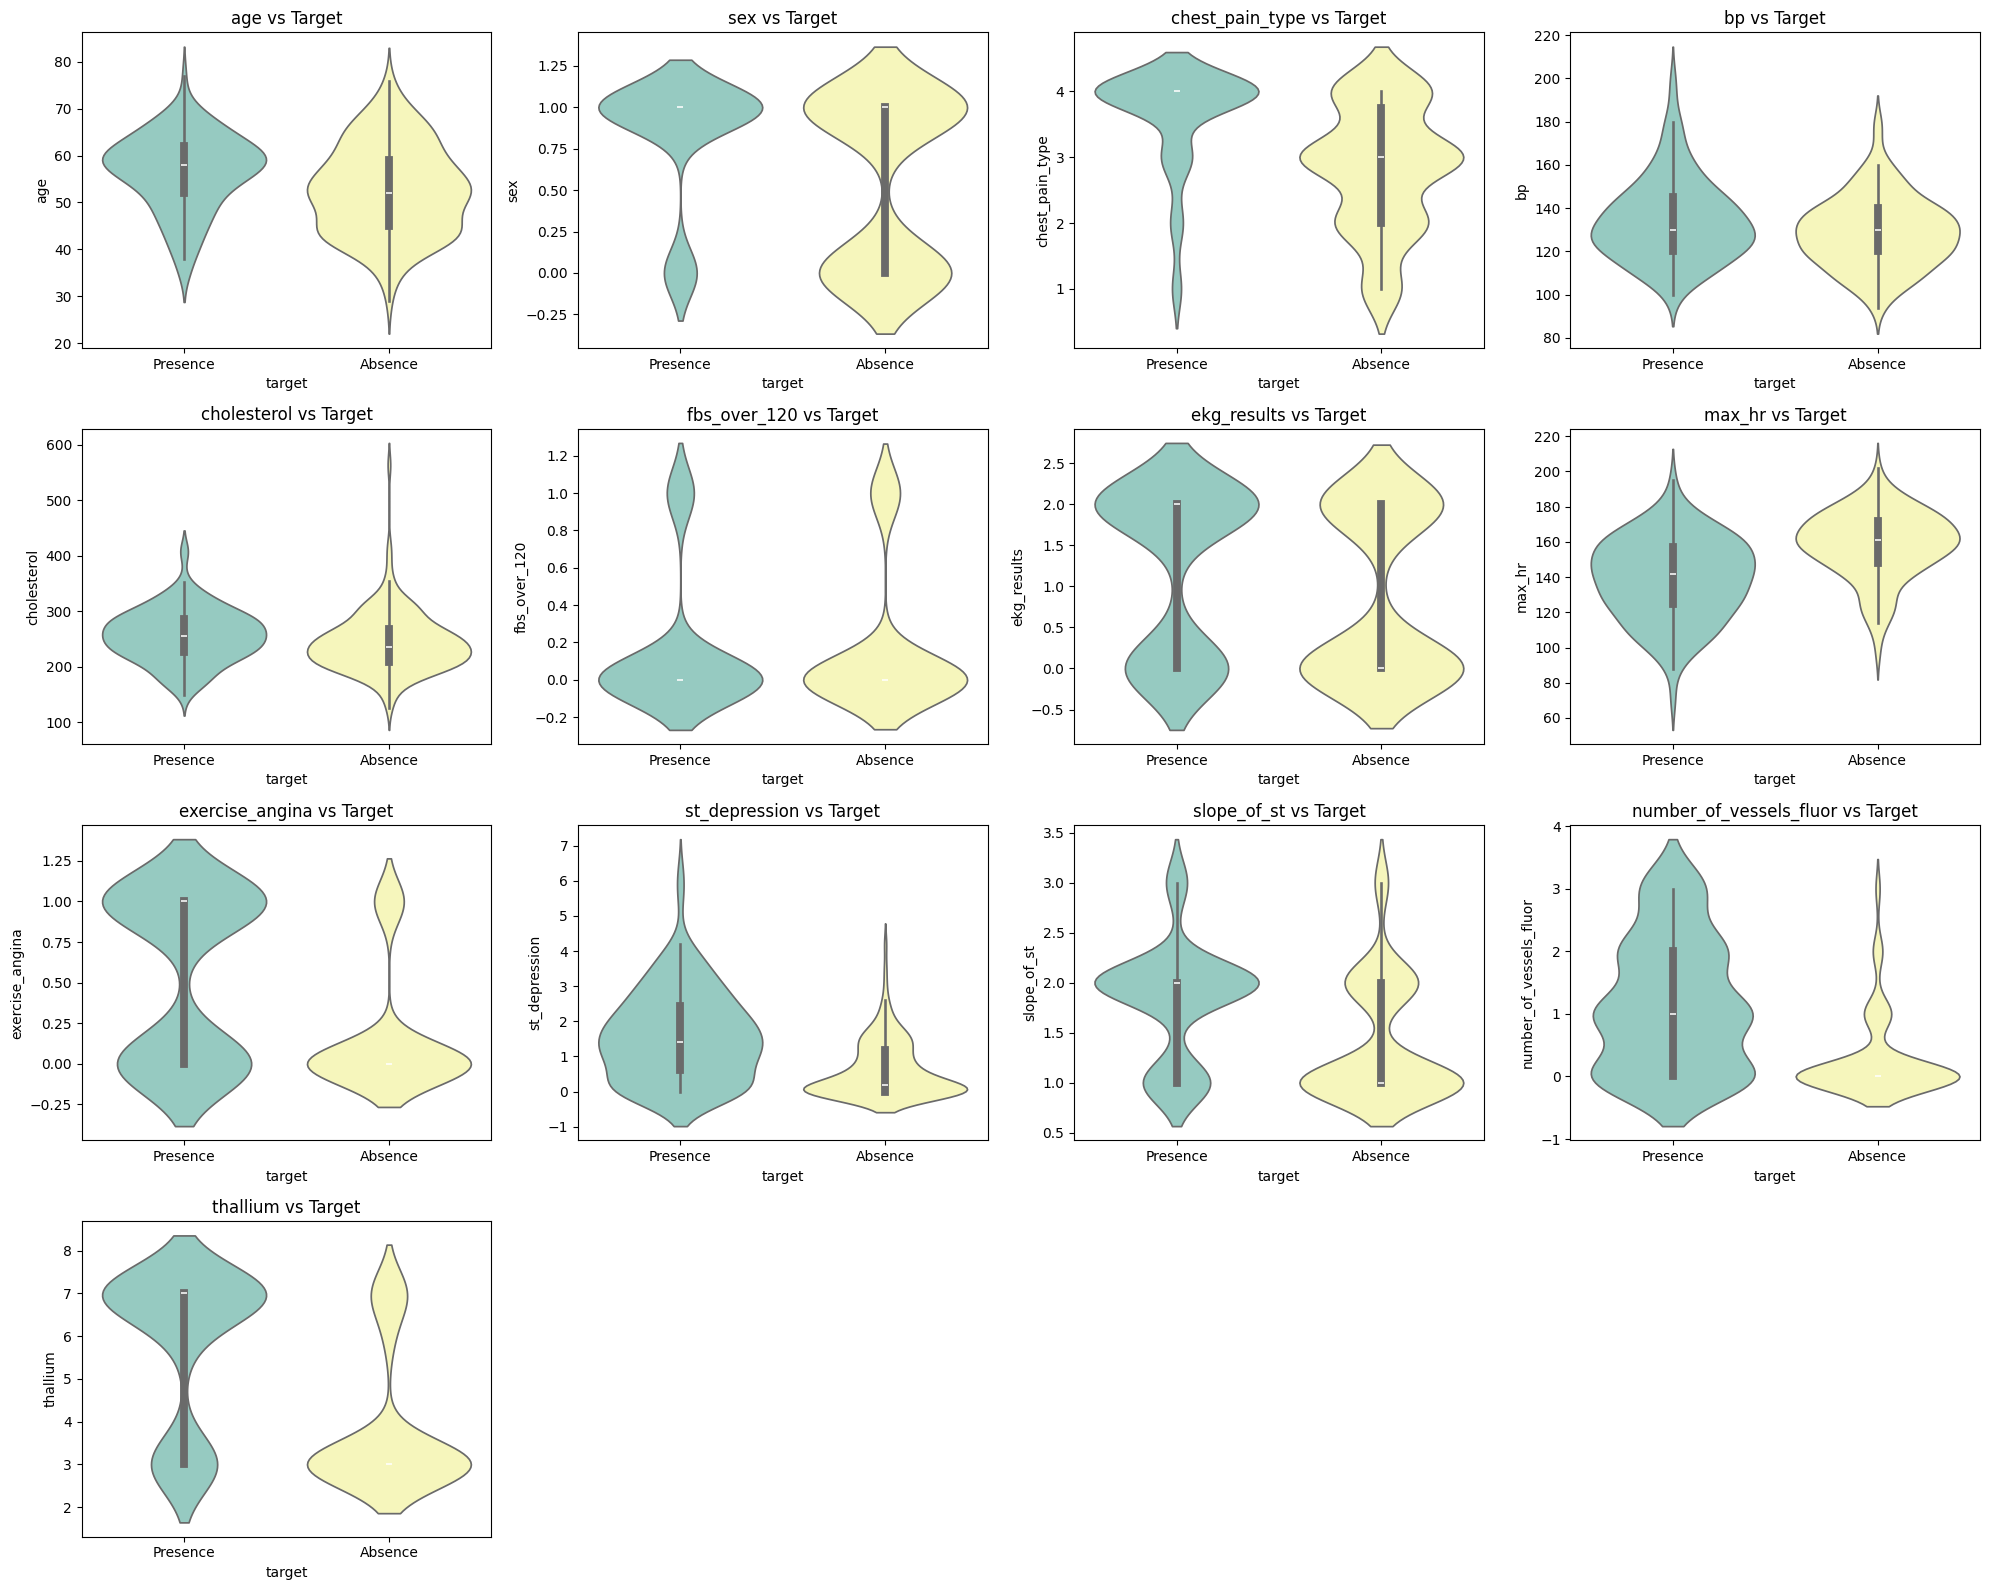

In [33]:
import numpy as np
colors = sns.color_palette("Set3", len(numerical_columns))

# Grid size
n_cols = 4
n_rows = int(np.ceil(len(numerical_columns) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
axes = axes.flatten()  # flatten for easy iteration

for i, col in enumerate(numerical_columns):
    sns.violinplot(
        data=raw_data,
        x="target",
        y=col,
        ax=axes[i],
        palette="Set3",
        hue="target"
    )
    axes[i].set_title(f"{col} vs Target")

# Remove empty subplots if any
for j in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## **STEP 3: Model Selection**

- this is a binary classification problem
- so I will be using the basic classification algorithm -- Logistic Regression


## **STEP 4: Feature Engineering/Feature Selection**

In [49]:
# segregating columns into features and target
X = raw_data.drop("target", axis=1)
y = raw_data["target"]
print("[INFO] Data segregated into features and target successfully")

# encoding the labels in the target column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print("[INFO] Data Labels Encoding successful")

# scaling the data
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
X_scaled = minmax_scaler.fit_transform(X)
X_df = pd.DataFrame(X_scaled, columns=X.columns)
print("[INFO] Data transformation complete")

[INFO] Data segregated into features and target successfully
[INFO] Data Labels Encoding successful
[INFO] Data transformation complete


In [56]:
y_df = pd.DataFrame(y_encoded, columns=['transformed_y'])
transformed_data = pd.concat([X_df, y_df], axis=1)
transformed_data.to_csv("../data/processed/transformed_data.csv", index=False)
transformed_data.head(3)

,age,sex,chest_pain_type,bp,cholesterol,fbs_over_120,ekg_results,max_hr,exercise_angina,st_depression,slope_of_st,number_of_vessels_fluor,thallium,transformed_y
0,0.854167,1.0,1.000000,0.339623,0.447489,0.0,1.0,0.290076,0.0,0.387097,0.5,1.0,0.0,1
1,0.791667,0.0,0.666667,0.198113,1.000000,0.0,1.0,0.679389,0.0,0.258065,0.5,0.0,1.0,0
2,0.583333,1.0,0.333333,0.283019,0.308219,0.0,0.0,0.534351,0.0,0.048387,0.0,0.0,1.0,1


## **STEP 5: Model Training and Model Evaluation**

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded,
                                                    test_size=0.2,
                                                    random_state=40)
print("[INFO] Data split into train-test partitions successfully")

[INFO] Data split into train-test partitions successfully


In [60]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=1500)
print("[INFO] Model training started")

lr_model.fit(X_train, y_train)
print("[INFO] Model training complete")

[INFO] Model training started
[INFO] Model training complete


In [64]:
from sklearn.metrics import *
y_pred = lr_model.predict(X_test)
y_pred_labelled = le.inverse_transform(y_pred)
y_true_labelled = le.inverse_transform(y_test)
model_performance = classification_report(y_pred=y_pred_labelled,
                                          y_true=y_true_labelled)
print(model_performance)

              precision    recall  f1-score   support

     Absence       0.75      0.87      0.81        31
    Presence       0.78      0.61      0.68        23

    accuracy                           0.76        54
   macro avg       0.76      0.74      0.74        54
weighted avg       0.76      0.76      0.75        54



In [70]:
le.classes_

array(['Absence', 'Presence'], dtype=object)

<Axes: >

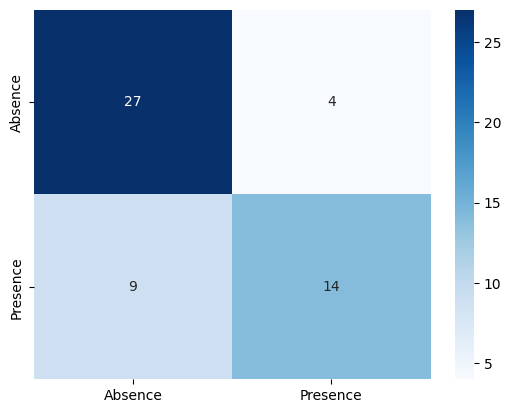

In [74]:
model_confusion_matrix = confusion_matrix(y_true=y_true_labelled,
                                          y_pred=y_pred_labelled)
sns.heatmap(model_confusion_matrix, cmap='Blues',
            xticklabels=['Absence', 'Presence'],
            yticklabels=['Absence', 'Presence'],
            annot=True)

## **STEP 6: Model Serialization**

In [78]:
import joblib
joblib.dump(lr_model, "../artifacts/lr_model.joblib")
joblib.dump(le, "../artifacts/label_encoder.joblib")
joblib.dump(minmax_scaler, "../artifacts/minmax_scaler.joblib")
print("[INFO] Artifacts serialized into joblib")

[INFO] Artifacts serialized into joblib
